In this assignment you will be using the data about the Titanic passengers to investigate the
survival factors.

Analysis Question: What factors made people more likely to survive? You need to investigate
three variables: Class, Sex, Age

The data is available in the “titanic-data.csv” file. The “Titanic Data Overview.docx” provides a
description of the data fields shown in the csv file.

Basically, you need to group the data according to each variable you want to investigate, then
compare the “Survived” numbers and ratios (Why we need to use ratios?).

For each comparison you perform, provide a bar plot to help visualize the results and summary
to explain your findings in the comparison.

In the end, provide a summary of your findings and your own conclusions.


In [539]:
# ipython Magic
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st

titanicData = pd.read_csv('titanic-data.csv')


In [540]:
#Only keep columns with variables I will be working with
titanicData = titanicData.drop(['Cabin','Ticket','Name','Fare','PassengerId', 'Parch','Embarked', 'SibSp'],axis=1)

#First five rows from table
print("First five rows from Titanic data:")
print(titanicData.head())

First five rows from Titanic data:
   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0


In [541]:
#Number of survivers
print("Number of survivors (1) and non-survivors (0):")
print(titanicData['Survived'].value_counts())

Number of survivors (1) and non-survivors (0):
0    549
1    342
Name: Survived, dtype: int64


In [542]:
#Percentage of survivors
print("Percentage of survivors (1) and non-survivors (0):")
print(titanicData['Survived'].value_counts() * 100 / len(titanicData))

Percentage of survivors (1) and non-survivors (0):
0    61.616162
1    38.383838
Name: Survived, dtype: float64


Graph of survivors (green) and non-survivors (red):


<AxesSubplot:title={'center':'Survivors (green) vs. Non-Survivors (red)'}>

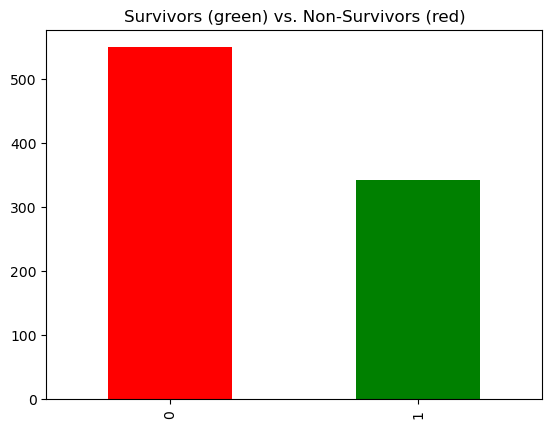

In [543]:
#Graph of survivors
print("Graph of survivors (green) and non-survivors (red):")
titanicData['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title="Survivors (green) vs. Non-Survivors (red)")

In [544]:
#Statistics of data
print("Statistics of data:")
titanicData.describe()

Statistics of data:


,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


Graph of men vs women:


<AxesSubplot:title={'center':'Count of men vs. women'}>

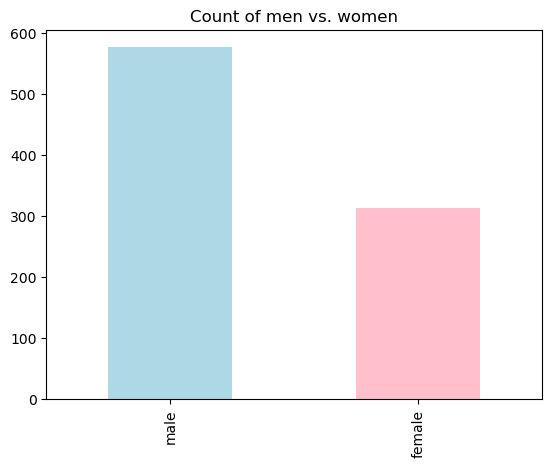

In [545]:
#Graph of men vs women
print("Graph of men vs women:")
titanicData['Sex'].value_counts().plot(kind='bar', color=['lightblue', 'pink'], title='Count of men vs. women')

<AxesSubplot:title={'center':'Passengers by class'}>

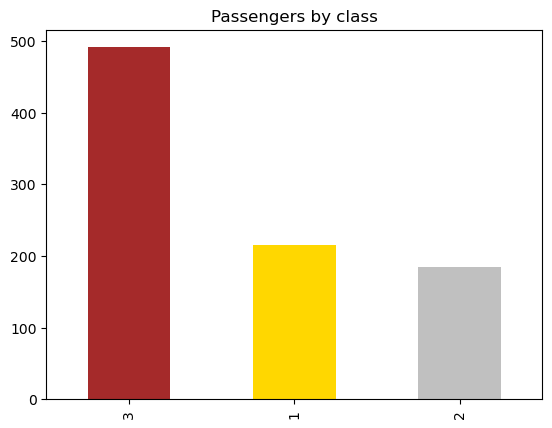

In [546]:
#Passengers by class
titanicData['Pclass'].value_counts().plot(kind='bar', color=['brown', 'gold', 'silver'], title='Passengers by class')

Graph of survivors by class:


<AxesSubplot:title={'center':'1st Class'}>

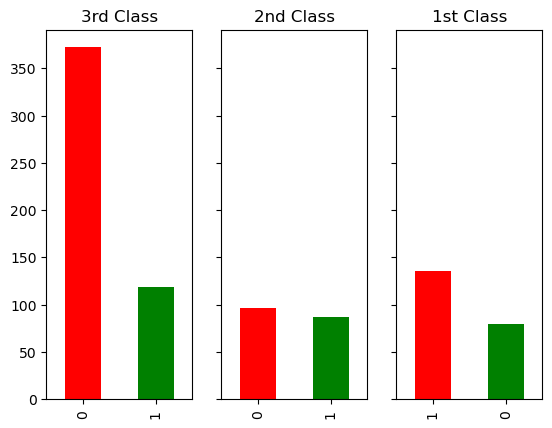

In [547]:
#Survivors by class
print("Graph of survivors by class:")
fig, axs = plt.subplots(1,3, sharey='row')

plt.yscale('linear')

titanicData[(titanicData['Pclass']  == 3)]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='3rd Class', ax=axs[0])
titanicData[(titanicData['Pclass']  == 2)]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='2nd Class', ax=axs[1])
titanicData[(titanicData['Pclass']  == 1)]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='1st Class', ax=axs[2])

Female survivors:


<AxesSubplot:title={'center':'Female 1st Class'}>

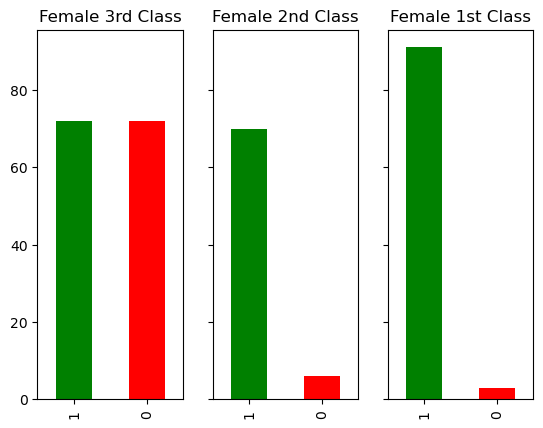

In [548]:
#Female survivors
print("Female survivors:")
fig, axs = plt.subplots(1,3, sharey='row')
titanicData[(titanicData['Sex'] == 'female') & (titanicData['Pclass']  == 3)]['Survived'].value_counts().plot(kind='bar', color=['green', 'red'], title='Female 3rd Class', ax=axs[0])
titanicData[(titanicData['Sex'] == 'female') & (titanicData['Pclass']  == 2)]['Survived'].value_counts().plot(kind='bar', color=['green', 'red'], title='Female 2nd Class', ax=axs[1])
titanicData[(titanicData['Sex'] == 'female') & (titanicData['Pclass']  == 1)]['Survived'].value_counts().plot(kind='bar', color=['green', 'red'], title='Female 1st Class', ax=axs[2])

Male survivors:


<AxesSubplot:title={'center':'Men 1st Class'}>

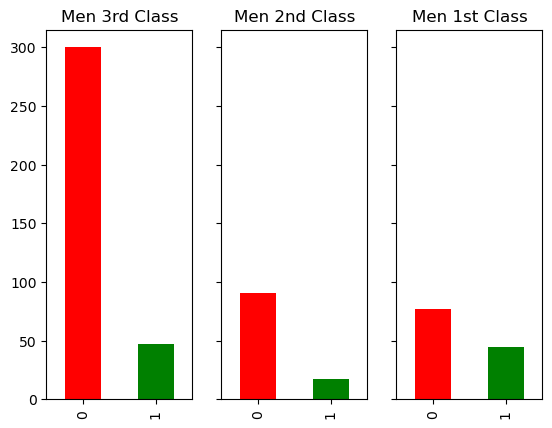

In [549]:
#Male survivors
print("Male survivors:")
fig, axs = plt.subplots(1,3, sharey='row')
titanicData[(titanicData['Sex'] == 'male') & (titanicData['Pclass']  == 3)]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='Men 3rd Class', ax=axs[0])
titanicData[(titanicData['Sex'] == 'male') & (titanicData['Pclass']  == 2)]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='Men 2nd Class', ax=axs[1])
titanicData[(titanicData['Sex'] == 'male') & (titanicData['Pclass']  == 1)]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='Men 1st Class', ax=axs[2])

In [550]:
#Statistics
c = titanicData[(titanicData['Pclass']  == 1)]['Survived'].value_counts()
f_survive = c[1]
f_no=c[0]
f_total = f_survive + f_no
c = titanicData[(titanicData['Pclass']  == 2)]['Survived'].value_counts()
s_survive = c[1]
s_no=c[0]
s_total = s_survive + s_no
c = titanicData[(titanicData['Pclass']  == 3)]['Survived'].value_counts()
t_survive = c[1]
t_no=c[0]
t_total =  t_survive + t_no

print("Total number of passengers: ", f_total + s_total + t_total)
print("Total number of survivors: ", f_survive  + s_survive  + t_survive )
print("Total number of deaths: ", t_no + s_no + f_no)
print("")
print("Percentage of first class survivors: ", f_survive / f_total*100)
print("Percentage of first class deaths: ", f_no / f_total*100)
print("Number of first class survivors", f_survive)
print("Number of first class deaths: ", f_no)
print("")
print("Percentage of second class survivors: ", s_survive / s_total*100)
print("Percentage of second class deaths: ", s_no / s_total*100)
print("Number of second class survivors", s_survive)
print("Number of second class deaths: ", s_no)
print("")
print("Percentage of third class survivors: ", t_survive / t_total*100)
print("Percentage of third class deaths: ", t_no / t_total*100)
print("Number of third class survivors", t_survive)
print("Number of third class deaths: ", t_no)

Total number of passengers:  891
Total number of survivors:  342
Total number of deaths:  549

Percentage of first class survivors:  62.96296296296296
Percentage of first class deaths:  37.03703703703704
Number of first class survivors 136
Number of first class deaths:  80

Percentage of second class survivors:  47.28260869565217
Percentage of second class deaths:  52.71739130434783
Number of second class survivors 87
Number of second class deaths:  97

Percentage of third class survivors:  24.236252545824847
Percentage of third class deaths:  75.76374745417516
Number of third class survivors 119
Number of third class deaths:  372


Percentage of survivors per class:


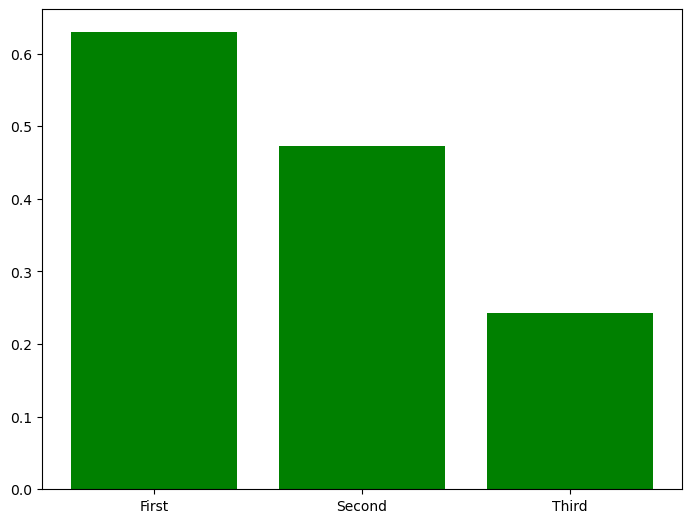

In [551]:
#Percentage of survivors per class
print("Percentage of survivors per class:")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['First', 'Second', 'Third']


percent = [(f_survive/f_total), ( s_survive/s_total), (t_survive/t_total)]
ax.bar(label, percent, color=['green'])
plt.show()

In [552]:
#More statistics
f = titanicData[(titanicData['Sex']  == 'female')]['Survived'].value_counts()
f_sur = f[1]
f_nosur = f[0]
m = titanicData[(titanicData['Sex']  == 'male')]['Survived'].value_counts()
m_sur = m[1]
m_nosur = m[0]

f_total = f_sur+f_nosur
m_total = m_sur + m_nosur

print("Total female passengers: ",f_total )
print("Total female survivors: ", f_sur)
print("Total female deaths: ", f_nosur)
print("")
print("Total male passengers: ",m_total )
print("Total male survivors: ", m_sur)
print("Total male deaths: ", m_nosur)
print("")
print("Female survivale rate: ", f_sur/f_total*100)
print("Male survival rate: ", m_sur/m_total *100)

Total female passengers:  314
Total female survivors:  233
Total female deaths:  81

Total male passengers:  577
Total male survivors:  109
Total male deaths:  468

Female survivale rate:  74.20382165605095
Male survival rate:  18.890814558058924


Count of males vs. females:


<AxesSubplot:title={'center':'Count of men vs. women'}>

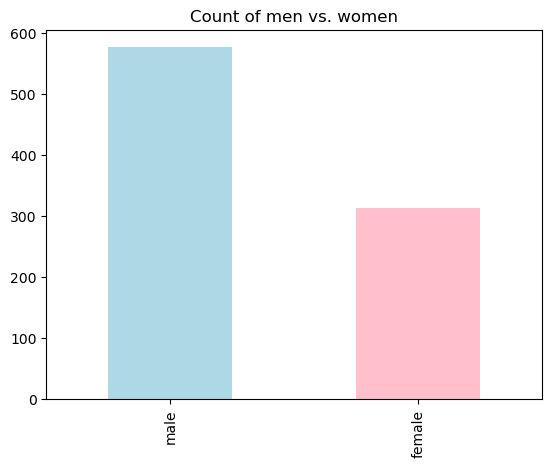

In [553]:
#Gender count
print("Count of males vs. females:")
titanicData['Sex'].value_counts().plot(kind='bar', color=['lightblue', 'pink'], title='Count of men vs. women')

Survivors and deaths of males and females:


<AxesSubplot:title={'center':'Female'}>

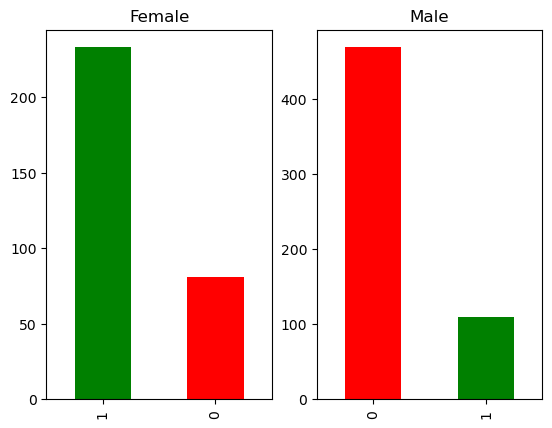

In [554]:
#Gender survivors and deaths
print("Survivors and deaths of males and females:")
fig, axs = plt.subplots(1,2)
titanicData[(titanicData['Sex'] == 'male')]['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], title='Male', ax=axs[1])
titanicData[(titanicData['Sex'] == 'female')]['Survived'].value_counts().plot(kind='bar', color=['green', 'red'], title='Female', ax=axs[0])


Text(0.5, 0, 'Age Groups')

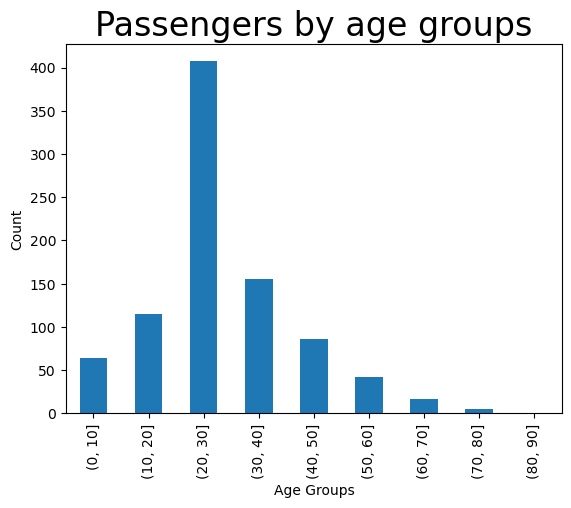

In [555]:
#Used average age when age was missing

avgAge = titanicData['Age'].mean()
titanicData['Age'] = titanicData.Age.fillna(avgAge)

#Create age intervals

ages = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
titanicData['age_group'] = pd.cut(titanicData.Age, ages, right=True, include_lowest=False)

#Graphs

titanicData.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Passengers by age groups",fontsize=24)
plt.ylabel('Count')
plt.xlabel('Age Groups')

Survivors by age group:


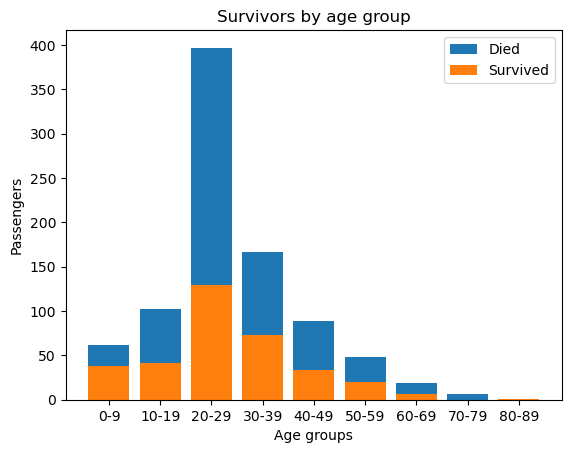

In [556]:
#Survivors by age group
print("Survivors by age group:")
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'

titanicData['AgeGroup'] = titanicData.Age.apply(age_group)

a_summary = titanicData.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
a_summary = a_summary.rename(columns={'sum':'Survived', 'size':'Total'})
a_summary
x = range(len(a_summary.index.values))
ht = a_summary.Total
hs = a_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, a_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by age group')


plt.legend([pht,phs],['Died', 'Survived'])

In [557]:
#Number of survivors by age group
print("Survivors by age group:")
print(titanicData.groupby(['age_group']).Survived.sum())

Survivors by age group:
age_group
(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
(80, 90]      0
Name: Survived, dtype: int64


Box plot of age by class:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

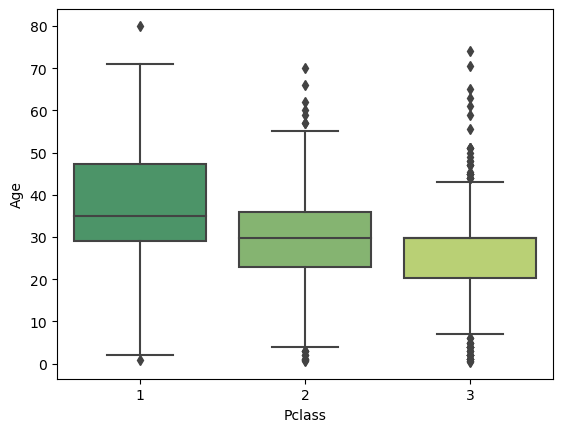

In [558]:
#Box plot of age by class
print("Box plot of age by class:")
sns.boxplot(x='Pclass',y='Age',data=titanicData,palette='summer')

Scatter plot of sex and class:


c:\Users\uly49\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\uly49\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\uly49\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\uly49\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\uly49\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.5% of the points c

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

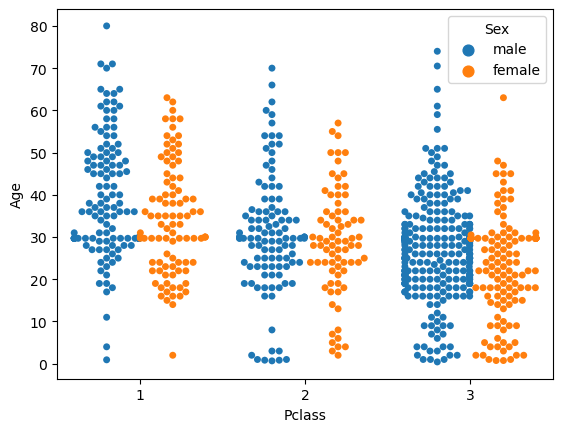

In [559]:
#Scatter plot of sex and class
print("Scatter plot of sex and class:")
sns.swarmplot(x='Pclass', y='Age', data=titanicData, hue='Sex', dodge=True)

Survivors by gender and class:


Text(0.5, 1.0, 'Survivors by gender and class')

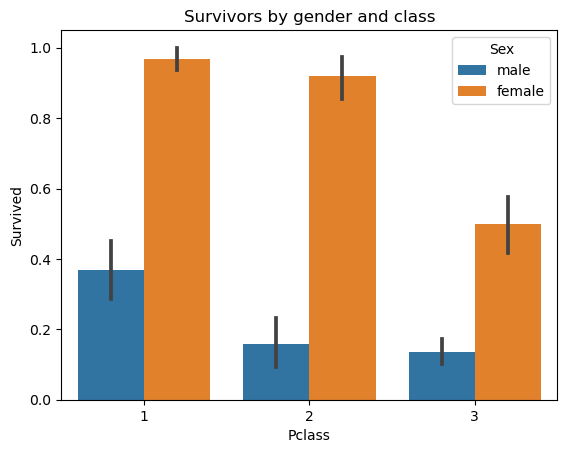

In [560]:
#Survivors by gender and class
print("Survivors by gender and class:")
sns.barplot(x='Pclass', y='Survived', data=titanicData, hue='Sex').set_title('Survivors by gender and class')

In [561]:
#Even more statistics
first_class = np.array([np.mean(titanicData[titanicData["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_class = np.array([np.mean(titanicData[titanicData["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

female = np.array([np.mean(titanicData[titanicData["Sex"]=='female'].sample(20)["Survived"].values) for i in range(100)])
male = np.array([np.mean(titanicData[titanicData["Sex"]=='male'].sample(20)["Survived"].values) for i in range(100)])

print("first class std: ", np.std(first_class))
print("third class std: ", np.std(third_class))
print("first class mean: ", np.mean(first_class))
print("third class mean: ", np.mean(third_class))
print("zscore first: ",  st.zscore(first_class).sum())
print("zscore third: ",  st.zscore(third_class).sum())

print()
print("female std: ", np.std(female))
print("male std: ", np.std(male))
print('female mean: ', np.mean(female))
print('male mean: ', np.mean(male))
print("zscore female: ",  st.zscore(female).mean())
print("zscore male: ",  st.zscore(male).mean())

first class std:  0.09982359440533084
third class std:  0.08475848040166836
first class mean:  0.6395000000000001
third class mean:  0.24599999999999997
zscore first:  -6.644684802381562e-14
zscore third:  3.8191672047105385e-14

female std:  0.09008190717341637
male std:  0.0905317623820502
female mean:  0.7355000000000002
male mean:  0.20200000000000004
zscore female:  -1.6786572132332366e-15
zscore male:  -4.085620730620576e-16


When looking at this data, all I can think about is James Cameron's Titanic. Mostly because of the line "Women and children first." This data proves that the crew of the titanic did, in fact, follow this rule. Females only made up 35% of the passengers, yet they made up 68% of total sutvivors with a survival rate of 75%. Specifically, females in first and second class had the highest survival rates. Not surprisingly, males in third class had the lowest survival rate. The second group of people with the highest survival rate were passengers in the 0-20 age group. First class passengers had a survival rate of 63% while third class passengers had a survival rate of only 24%. So, clearly, first class passengers had preference in filling lifeboats. Using the Z-Test, the null hypothesis would be that gender and passenger class had no affect on survival rate. Th alternate hypothesis would be that gender and passenger class did have an affect on survival rate. All this data and graphs clealy prove that the alternate hypothesis is true. Given the Z-Scores and Standard Deviations of first and third class and gender, we can reject the null hypothesis and accept the alternate hypothesis.